<a href="https://colab.research.google.com/github/jasmine400/nlp-/blob/main/som_with_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/deep_learning/')

Mounted at /content/drive


In [ ]:
import math
from math import sqrt
import scipy.io as sio
import numpy as np
import pickle
from keras.utils import np_utils
MnistTrainX = sio.loadmat ('MnistTrainX')['MnistTrainX']
MnistTrainY = sio.loadmat ('MnistTrainY')['MnistTrainY']
MnistTrainY = np_utils.to_categorical(MnistTrainY, 10)
MnistTrainX = MnistTrainX.astype('float32')
MnistTrainY = MnistTrainY.astype('float32')

MnistTestX  = sio.loadmat ('MnistTestX')['MnistTestX']
MnistTestY  = sio.loadmat ('MnistTestY')['MnistTestY']
MnistTestY = np_utils.to_categorical(MnistTestY, 10)
MnistTestX = MnistTestX.astype('float32')
MnistTestY = MnistTestY.astype('float32')

In [ ]:
train_x=MnistTrainX.tolist()
train_y=MnistTrainY.tolist()
test_x=MnistTestX.tolist()
test_y=MnistTestY.tolist()

In [ ]:
x_trn=[]

for j in range(len(train_y)):
  i=train_y[j]
  index=i.index(1)
  if index==4:
    x_trn.append(train_x[j])


In [ ]:
print(len(x_trn))

5842


In [ ]:
def manhattan_dist(r1, r2):
  sum=0
  for i in range(len(r1)):
    mhnt=r1[i]-r2[i]
    if mhnt<0:
      mhnt=mhnt*-1
    sum=mhnt+sum
  return sum

In [ ]:
def winner(weights,sample):
  d=0
  min= float('inf')
  for r in range(len(weights)):
    for c in range(len(weights[0])):

      d=d+(sample[c]-(weights[r][c])**2)
      if d<min:
        min=d
        row=r
        column=c
        #idx=u
  clusters=weights[row]
  return clusters

In [ ]:
def w(train,fweight,m):
  alpha=0.5
  weightss=fweight
  epochs=100
  Rows = 3; Cols = 3
  RangeMax = Rows + Cols
  for k in range(epochs):
    pct_left = 1.0 - ((k * 1.0) / epochs)
    curr_range = (int)(pct_left * RangeMax)
    curr_rate = pct_left * alpha
    for j in range(m):
      t=train[j]
      b=winner(weightss,t)
      for r in range(len(weightss)):
        #for c in range(len(weightss[0])):
        nei=weightss[r]
          # print(nei)
          # print(b)
        d=manhattan_dist(nei,b)
        if d<curr_range:
          en=(-1*(d**2)/0.4)
          h=math.exp(en)
          en=(-1*(d**2)/0.4)
          h=math.exp(en)

          for u in range(len(weightss[0])):
            weightss[r][u]=weightss[r][u]+(h*curr_rate*(t[u]-weightss[r][u]))
      print(j)

        # nei=weightss[i]
        # d=manhattan_dist(nei,b)
        # h=math.exp((d**2)/(2(0.5**2)))
        # for j in range(len(t)) :
        #   weights[i][j] = weights[J][i] + alpha * ( sample[i] - weights[J][i] )

        # weightss[b][i] = weightss[b][i] + alpha * ( t[i] - weightss[b][i] )

    file_name = f'som_checkpoint_epoch_{epochs}.pkl'
    open_file = open(file_name, "wb")
    pickle.dump(weightss, open_file)
    open_file.close()
    print(k)
  return weightss

In [ ]:
m=len(x_trn)
map = np.random.random_sample(size=(9,784))
weights=map.tolist()
lastw=w(x_trn,weights,m)

Streaming output truncated to the last 5000 lines.
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1

In [ ]:
print(lastw)

[[0.24404137919953994, 0.09323883468973154, 0.33738860486101413, 0.24437473788357045, 0.1568533477119622, 0.16953522294574064, 0.19273237900472862, 0.26652307646113815, 0.09930755718874534, 0.014011500949952294, 0.4607768763730881, 0.35224348127384053, 0.43600857755711575, 0.22644737335684556, 0.4427980737520849, 0.07961208802014613, 0.45842614505326396, 0.3939967484048123, 0.39381027389220474, 0.48214407331274794, 0.46354594895209844, 0.2542242521143774, 0.07163302917708281, 0.30667328260090804, 0.1008592022675624, 0.19391291994601872, 0.09229277385592399, 0.22557641385770055, 0.12115578648495168, 0.20050410704937321, 0.25109749252093244, 0.40872589541051274, 0.3326646141503812, 0.4918079410552199, 0.32101391794038636, 0.30804689029898624, 0.2740963381403967, 0.14405288314745957, 0.14320047779111872, 0.130129290726899, 0.07180630010084205, 0.45659662203869605, 0.45833131888374073, 0.33248490080427084, 0.32302421167473055, 0.12889057134483695, 0.35879430396172807, 0.09612937488369266, 

In [ ]:
print(len(lastw))

9


In [ ]:
print(len(lastw[0]))

784


In [ ]:
lw = np.array(lastw)

In [ ]:
print(lw)

[[2.44041379e-001 9.32388347e-002 3.37388605e-001 ... 3.96608249e-001
  7.67583411e-002 5.10758845e-002]
 [4.94539000e-002 8.89428705e-003 1.08500230e-002 ... 8.37649835e-004
  3.83577139e-002 5.35677892e-003]
 [4.11856776e-001 6.15368102e-002 4.55970417e-001 ... 2.61182950e-001
  1.70159676e-001 4.75253683e-001]
 ...
 [2.81906685e-001 1.09750226e-001 5.44195274e-002 ... 1.29577022e-001
  1.33356951e-001 6.11408931e-002]
 [1.24463981e-002 2.21845673e-001 1.69944982e-001 ... 2.03329786e-001
  4.00702126e-002 8.36503435e-002]
 [4.94065646e-324 4.94065646e-324 4.94065646e-324 ... 4.94065646e-324
  4.94065646e-324 4.94065646e-324]]


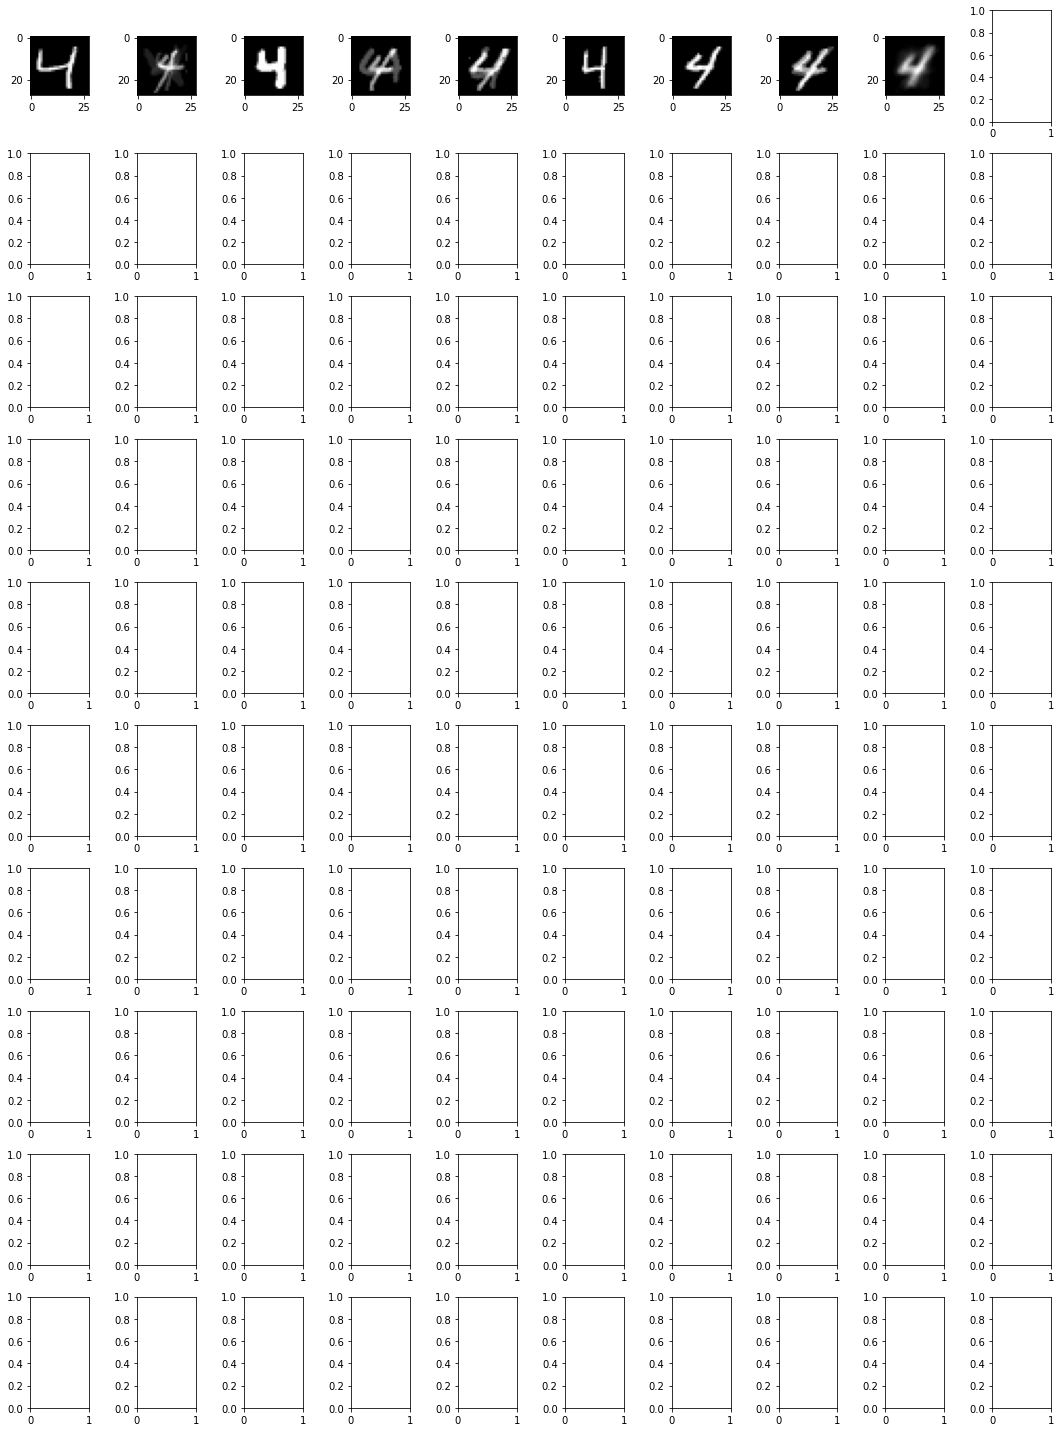

In [ ]:
m=len(lw)
n=len(lastw[0])
import matplotlib.pyplot as plt
%matplotlib inline
num=100
num_row = 10
num_col = 10# plot images
u=0
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(m):
  #for j in range(n):
  img=lw[i]
    #print(img)
  image=img.reshape(28,28)
  ax = axes[u//num_col, u%num_col]
  ax.imshow(image, cmap='gray')
  u=u+1
plt.tight_layout()
plt.show()